In [1]:
import pandas as pd

[['SJDR1'],
 ['LD1'],
 ['LD2'],
 ['TR1'],
 ['TR2'],
 ['SVM'],
 ['SJDR1', 'LD1'],
 ['SJDR1', 'LD2'],
 ['SJDR1', 'TR1'],
 ['SJDR1', 'TR2'],
 ['SJDR1', 'SVM'],
 ['LD1', 'LD2'],
 ['LD1', 'TR1'],
 ['LD1', 'TR2'],
 ['LD1', 'SVM'],
 ['LD2', 'TR1'],
 ['LD2', 'TR2'],
 ['LD2', 'SVM'],
 ['TR1', 'TR2'],
 ['TR1', 'SVM'],
 ['TR2', 'SVM'],
 ['SJDR1', 'LD1', 'LD2'],
 ['SJDR1', 'LD1', 'TR1'],
 ['SJDR1', 'LD1', 'TR2'],
 ['SJDR1', 'LD1', 'SVM'],
 ['SJDR1', 'LD2', 'TR1'],
 ['SJDR1', 'LD2', 'TR2'],
 ['SJDR1', 'LD2', 'SVM'],
 ['SJDR1', 'TR1', 'TR2'],
 ['SJDR1', 'TR1', 'SVM'],
 ['SJDR1', 'TR2', 'SVM'],
 ['LD1', 'LD2', 'TR1'],
 ['LD1', 'LD2', 'TR2'],
 ['LD1', 'LD2', 'SVM'],
 ['LD1', 'TR1', 'TR2'],
 ['LD1', 'TR1', 'SVM'],
 ['LD1', 'TR2', 'SVM'],
 ['LD2', 'TR1', 'TR2'],
 ['LD2', 'TR1', 'SVM'],
 ['LD2', 'TR2', 'SVM'],
 ['TR1', 'TR2', 'SVM'],
 ['SJDR1', 'LD1', 'LD2', 'TR1'],
 ['SJDR1', 'LD1', 'LD2', 'TR2'],
 ['SJDR1', 'LD1', 'LD2', 'SVM'],
 ['SJDR1', 'LD1', 'TR1', 'TR2'],
 ['SJDR1', 'LD1', 'TR1', 'SVM'],
 ['SJDR1

In [ ]:
df_tuesday = pd.DataFrame({'PRESUMED_RESIDENCE':['SJDR1', 'LD1', 'LD1', 'LD', 'TR', 'SVM'],
                   'LOWER_MEAN': [2,4,6,3,5,7],
                   'HIGHER_MEAN': [4,6,8,5,7,9]})

df_tuesday = df_tuesday.set_index('PRESUMED_RESIDENCE')

df_monday = pd.DataFrame({'PRESUMED_RESIDENCE':['SJDR1', 'LD1', 'LD1', 'LD', 'TR', 'SVM'],
                   'LOWER_MEAN': [4,6,8,3,9,7],
                   'HIGHER_MEAN': [5,6,8,12,11,9]})

df_monday = df_monday.set_index('PRESUMED_RESIDENCE')

In [15]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

No handles with labels found to put in legend.


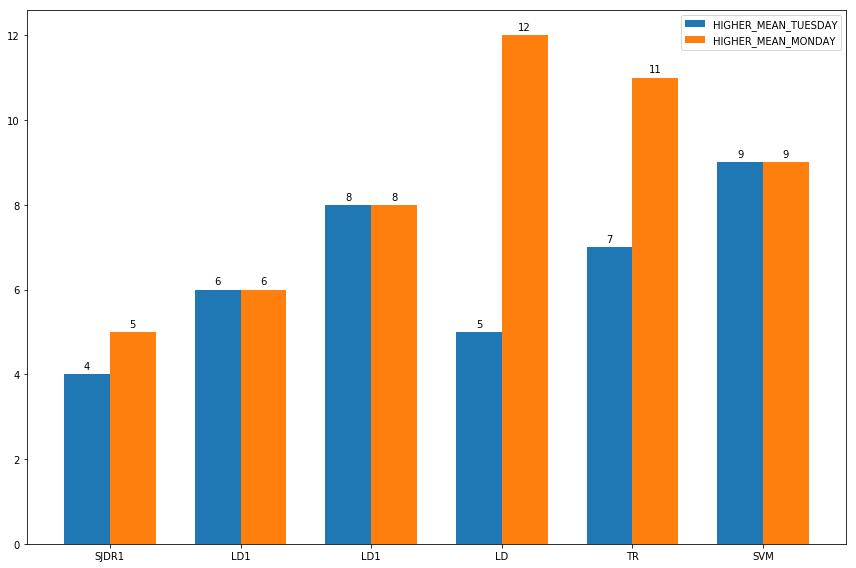

In [20]:
import matplotlib.pyplot as plt

x = np.arange(len(df_tuesday))
width = 0.35

fig, ax = plt.subplots(figsize=(12,8))

ax.set_xticks(x)
ax.set_xticklabels(df_tuesday.index.values)
ax.legend()

rects1 = ax.bar(x - width/2, df_tuesday.HIGHER_MEAN, width, label='HIGHER_MEAN_TUESDAY')
rects2 = ax.bar(x + width/2, df_monday.HIGHER_MEAN, width, label='HIGHER_MEAN_MONDAY')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.legend()
plt.show()


In [17]:
df_tuesday.index.values

array(['SJDR1', 'LD1', 'LD1', 'LD', 'TR', 'SVM'], dtype=object)

In [3]:
antennas_loc = pd.DataFrame({'ANTENNA_ID': ['SJDR1', 'LD1', 'LD2', 'TR', 'SVM'],'LAT': [-22.98, -22.97, -22.92, -22.87, -22.89], 'LONG': [-43.19, -43.39, -43.24, -43.28, -43.67]})
antennas_loc

,ANTENNA_ID,LAT,LONG
0,SJDR1,-22.98,-43.19
1,LD1,-22.97,-43.39
2,LD2,-22.92,-43.24
3,TR,-22.87,-43.28
4,SVM,-22.89,-43.67


In [4]:
def dist(x, y):
    
    lat1 = radians(x[0])
    lon1 = radians(x[1])
    lat2 = radians(y[0])
    lon2 = radians(y[1])
    
    R = 6373.0
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat/2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    
    return round(distance, 4)

distances = pdist(antennas_loc[['LAT', 'LONG']].values, metric=dist)

points = antennas_loc['ANTENNA_ID'].values

result = pd.DataFrame(squareform(distances), columns=points, index=points)

result

,SJDR1,LD1,LD2,TR,SVM
SJDR1,0.0000,20.5115,8.4123,15.3203,50.1784
LD1,20.5115,0.0000,16.3400,15.8341,30.0319
LD2,8.4123,16.3400,0.0000,6.9086,44.1838
TR,15.3203,15.8341,6.9086,0.0000,40.0284
SVM,50.1784,30.0319,44.1838,40.0284,0.0000


In [5]:
distances = pdist(antennas_loc[['LAT', 'LONG']].values, metric=dist)

points = antennas_loc['ANTENNA_ID'].values

result = pd.DataFrame(squareform(distances), columns=points, index=points)

result

,SJDR1,LD1,LD2,TR,SVM
SJDR1,0.0000,20.5115,8.4123,15.3203,50.1784
LD1,20.5115,0.0000,16.3400,15.8341,30.0319
LD2,8.4123,16.3400,0.0000,6.9086,44.1838
TR,15.3203,15.8341,6.9086,0.0000,40.0284
SVM,50.1784,30.0319,44.1838,40.0284,0.0000


In [7]:
melt_df = pd.melt(result.reset_index(), id_vars='index')
melt_df.rename(columns={'index': 'ANTENNA_ID', 'variable': 'PRESUMED_RESIDENCE', 'value': 'DISTANCE'}, inplace=True)

melt_df

,ANTENNA_ID,PRESUMED_RESIDENCE,DISTANCE
0,SJDR1,SJDR1,0.0000
1,LD1,SJDR1,20.5115
2,LD2,SJDR1,8.4123
3,TR,SJDR1,15.3203
4,SVM,SJDR1,50.1784
5,SJDR1,LD1,20.5115
6,LD1,LD1,0.0000
7,LD2,LD1,16.3400
8,TR,LD1,15.8341
9,SVM,LD1,30.0319


In [9]:
df_main = pd.merge(merged, melt_df, left_on=['ANTENNA_ID', 'PRESUMED_RESIDENCE'], right_on=['ANTENNA_ID', 'PRESUMED_RESIDENCE'])
df_final = df_main.groupby(['USER', 'PRESUMED_RESIDENCE']).agg({'ANTENNA_ID': list, 'DISTANCE': sum}).reset_index()
df_final.rename(columns={'ANTENNA_ID':'CALL_LOC', 'DISTANCE': 'TRAVELLED_DISTANCE'}, inplace=True)

df_final


,USER,PRESUMED_RESIDENCE,CALL_LOC,TRAVELLED_DISTANCE
0,1,SJDR1,"[SJDR1, TR]",15.3203
1,2,LD1,"[LD1, SVM]",30.0319
2,3,LD1,[LD1],0.0000


In [12]:
melt_df

,ANTENNA_ID,PRESUMED_RESIDENCE,DISTANCE
0,SJDR1,SJDR1,0.0000
1,LD1,SJDR1,20.5115
2,LD2,SJDR1,8.4123
3,TR,SJDR1,15.3203
4,SVM,SJDR1,50.1784
5,SJDR1,LD1,20.5115
6,LD1,LD1,0.0000
7,LD2,LD1,16.3400
8,TR,LD1,15.8341
9,SVM,LD1,30.0319
